In [1]:
import numpy as np                     

import matplotlib.image as mpimg       # convertir les images en matrices 
import matplotlib.pyplot as plt        
import matplotlib.patches as mpatches  # Déssiner un cercle au milieu de la forme

from skimage import measure            # Trouver le contour
import scipy.ndimage as ndi            # Déterminer le centre de la forme

In [2]:
import cv2 as cv
import seaborn as sns

In [3]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # Réglage de la dimension des plots

In [16]:
image = cv.imread("C:/Users/HP/Pictures/paramecie/Photo2.jpg", 0) # Charger une image 
resise = cv.resize(image,(102, 136)) # réduire la taille de l'image pour bien montrer son format numérique

In [17]:
image.shape[0]

2448

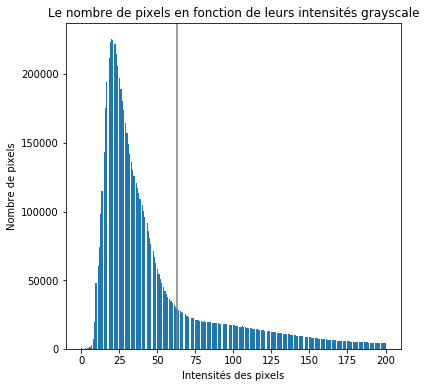

In [21]:
plt.hist(image.ravel(), 256,[0,200]) 
plt.axvline(x=20*np.pi, color='gray')
plt.title("Le nombre de pixels en fonction de leurs intensités grayscale", fontsize='12')
plt.xlabel("Intensités des pixels")
plt.ylabel("Nombre de pixels")
plt.show()

Text(0, 0.5, 'y')

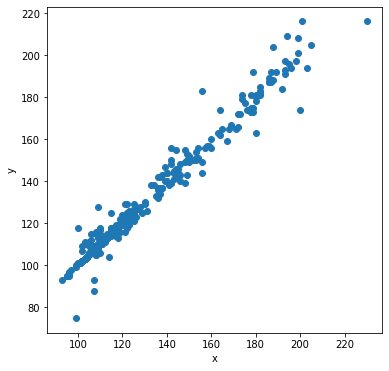

In [118]:
plt.scatter(image[0], image[1])
plt.xlabel("x")
plt.ylabel("y")

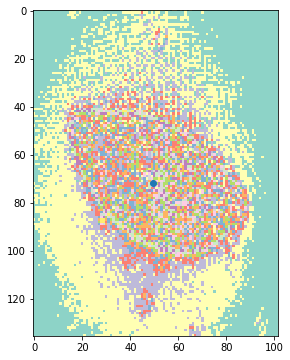

In [22]:
img = mpimg.imread('C:/Users/HP/Pictures/paramecie/Photo2.jpg')

cy, cx = ndi.center_of_mass(resise) # Trouver le centre de l'image

fig = plt.imshow(resise, cmap='Set3')  # 
#fig, ax = sns.heatmap(resise, fmt="d")
plt.scatter(cx, cy)           # show me its center
plt.show()

In [23]:
resise.shape

(136, 102)

In [41]:
from math import floor
import seaborn

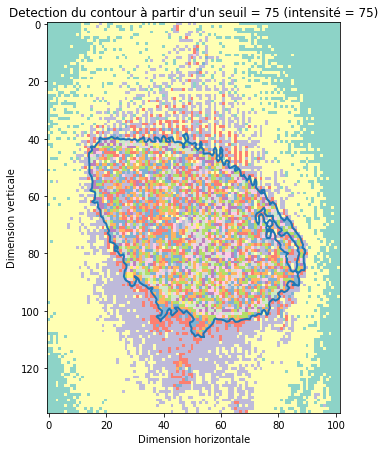

In [66]:
moyenne = np.mean(resise)
m = ((np.min(resise) + 255)/2)

contours = measure.find_contours(resise, 75) # la moyenne des intensités des pixels assure le tracé du contour


contour = max(contours, key=len)

# Détecter le contouring
plt.plot(contour[::,1], contour[::,0], linewidth=2.0)  # 
plt.imshow(resise,vmin=0, cmap='Set3')
plt.tight_layout()
plt.title("Detection du contour à partir d'un seuil = 75 (intensité = 75)")
plt.xlabel("Dimension horizontale")
plt.ylabel("Dimension verticale")
plt.show()

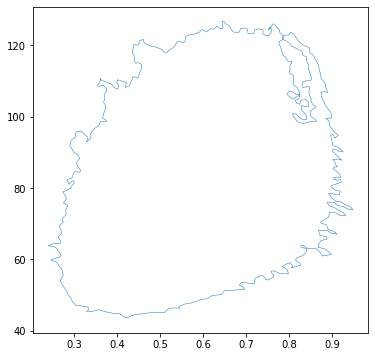

In [67]:
## Tracer le contour sur un plan cartésien
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [rho, phi]

# just calling the transformation on all pairs in the set
polar_contour = np.array([cart2pol(x, y) for x, y in contour])

# and plotting the result
plt.plot(polar_contour[::,1], polar_contour[::,0], linewidth=0.5)
plt.show()

In [68]:
np.max(resise)

242

In [69]:
# if we substract a number from an array of numbers,
# it assumes that we wanted to substract from all members
contour[::,1] -= cx  # demean X
contour[::,0] -= cy  # demean Y

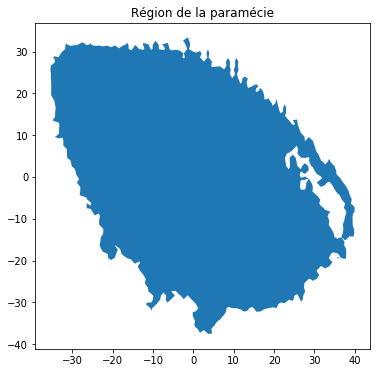

In [71]:
plt.fill(contour[::,1], -contour[::,0], linewidth=2.0)
#plt.grid()
plt.title("Région de la paramécie")
plt.scatter(0, 0)
plt.show()

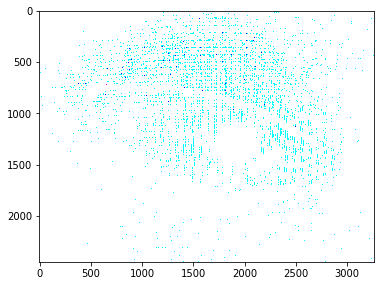

In [99]:
plt.imshow(img.astype(bool).astype(float), cmap='hot')
plt.show()